Analyze prescription impact on hospitalization

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Obtain prescription drug data
rx = pd.read_csv('../../DE1_0_2008_to_2010_Prescription_Drug_Events_Sample_2.csv')

/Users/ksenia/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
rx.head()

,DESYNPUF_ID,PDE_ID,SRVC_DT,PROD_SRVC_ID,QTY_DSPNSD_NUM,DAYS_SUPLY_NUM,PTNT_PAY_AMT,TOT_RX_CST_AMT
0,00000B48BCF4AD29,83224466404678,20100207,185010401,30.0,30,0.0,10.0
1,00000B48BCF4AD29,83654467130740,20100312,115163303,100.0,30,0.0,30.0
2,00000B48BCF4AD29,83574462630098,20100421,117193205,20.0,20,0.0,160.0
3,00000B48BCF4AD29,83734462622581,20100427,19458016707,30.0,30,10.0,0.0
4,00000B48BCF4AD29,83594462991534,20100611,59746011109,30.0,30,0.0,0.0


In [5]:
patient_demographics = pd.read_csv('preprocessed_data.csv')

In [6]:
patient_demographics.head()

,Unnamed: 0,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,BENE_COUNTY_CD,SP_ALZHDMTA,SP_CHF,...,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,DEATH,CLM_ADMSN_DT,Y,fst_admsn_dt
0,0,00000B48BCF4AD29,19230901,NaN,2,5,10,260,2,1,...,2,2,2,600.0,30.0,0.0,0,20080707.0,0,NaN
1,1,00000B48BCF4AD29,19230901,NaN,2,5,10,260,2,1,...,2,2,2,600.0,30.0,0.0,0,20080724.0,0,NaN
2,2,00000B48BCF4AD29,19230901,NaN,2,5,10,260,2,1,...,2,2,2,600.0,30.0,0.0,0,20080805.0,0,NaN
3,3,0000525AB30E4DEF,19201001,NaN,2,1,31,300,2,2,...,2,2,2,240.0,190.0,0.0,0,20080525.0,0,NaN
4,4,0000525AB30E4DEF,19201001,NaN,2,1,31,300,2,2,...,2,2,2,240.0,190.0,0.0,0,20080918.0,0,NaN


In [7]:
working_df = patient_demographics[['DESYNPUF_ID', 'Y', 'fst_admsn_dt']]

In [8]:
working_df.head()

,DESYNPUF_ID,Y,fst_admsn_dt
0,00000B48BCF4AD29,0,NaN
1,00000B48BCF4AD29,0,NaN
2,00000B48BCF4AD29,0,NaN
3,0000525AB30E4DEF,0,NaN
4,0000525AB30E4DEF,0,NaN


In [27]:
#Add a column indicating if a patient is taking a prescription
working_df['taking_rx'] = working_df.DESYNPUF_ID.isin(rx.DESYNPUF_ID.values)

/Users/ksenia/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
working_df.taking_rx = working_df.taking_rx.astype(int)

/Users/ksenia/anaconda/envs/py36/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [32]:
working_df.corr()

,Y,fst_admsn_dt,taking_rx
Y,1.000000,0.041601,0.078275
fst_admsn_dt,0.041601,1.000000,-0.016546
taking_rx,0.078275,-0.016546,1.000000


/Users/ksenia/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))


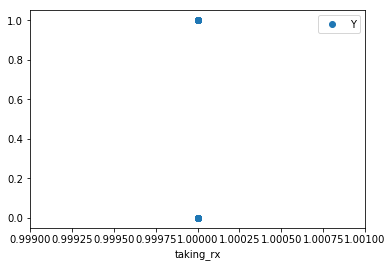

In [38]:
working_df.plot(x='taking_rx',y='Y',style='o')
plt.show()